## Perceptron Implementation

In [0]:
def perceptron(x1,x2,w1,w2,b):
                     #this is a two input perceptron
                     # we really really should implement neural networks in vector form, otherwise our programs would be awfully slow! 
                     # we had an entire exercise on this. Here just for the sake of simplicity and better understanding of what is happening we are using looping
                     #otherwise vectorization is a must.
  if(0<(x1*w1+x2*w2+b)):
    return(1)
  else:
    return(0)

## Data

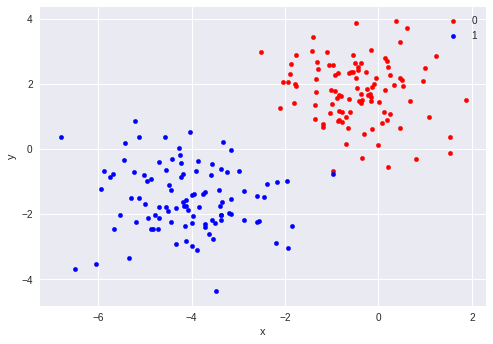

In [0]:
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
Data_set_size=200
X, Y = make_blobs(n_samples=200, centers=2, n_features=2,cluster_std=1, center_box=(-4.0, 4.0),random_state=1)
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

# Perceptron Training

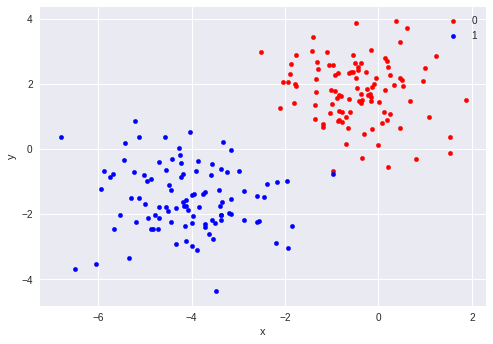

[1.37900636 2.03826475]


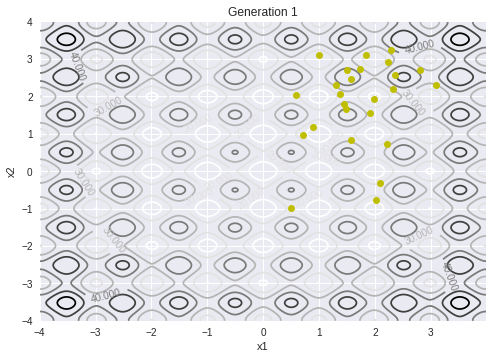

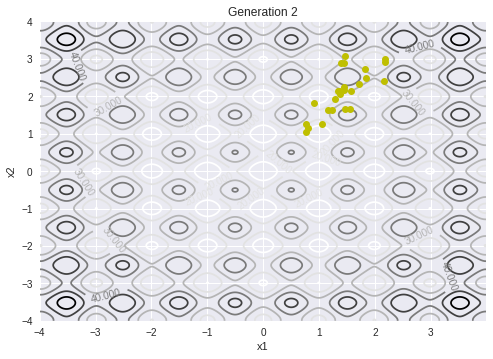

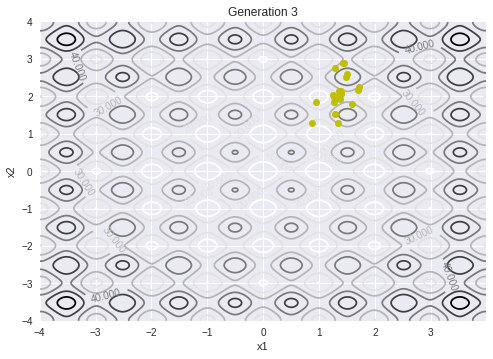

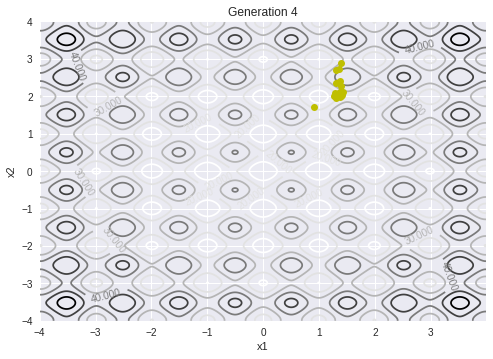

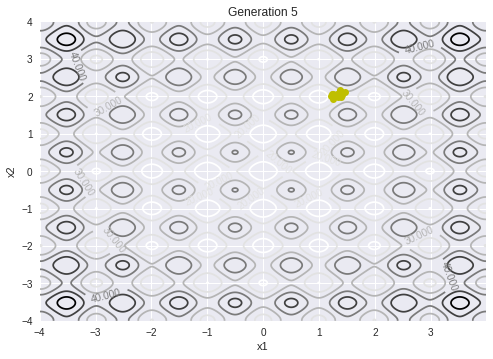

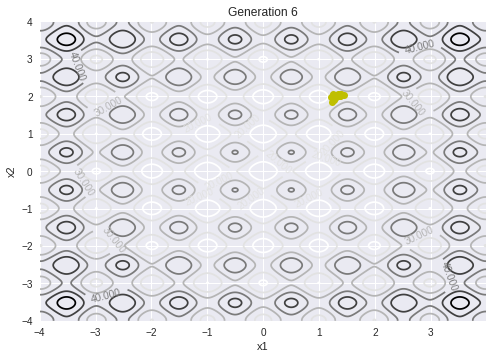

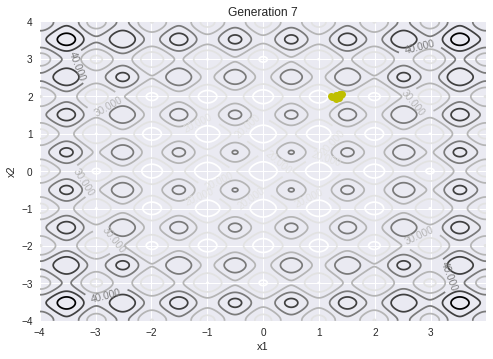

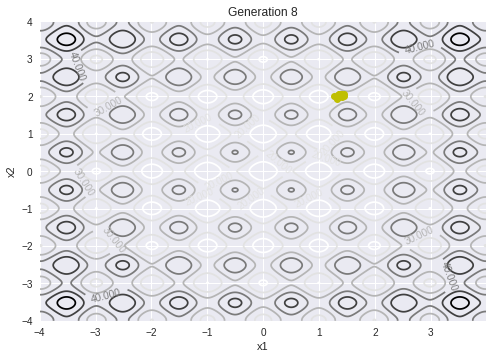

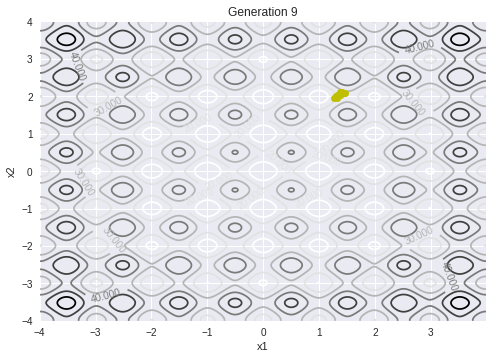

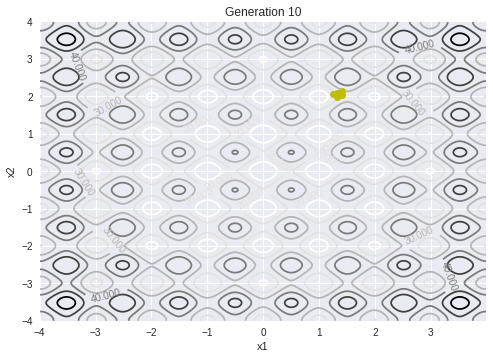

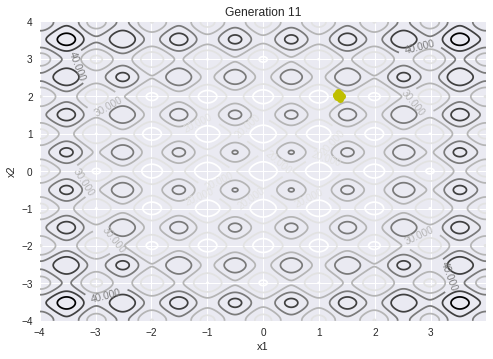

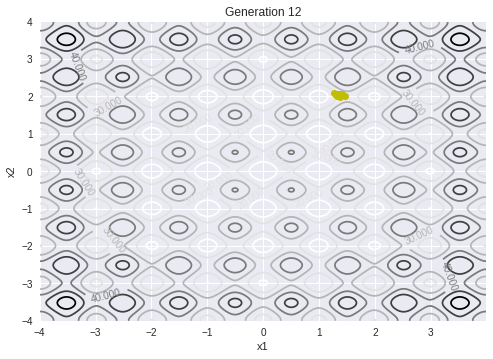

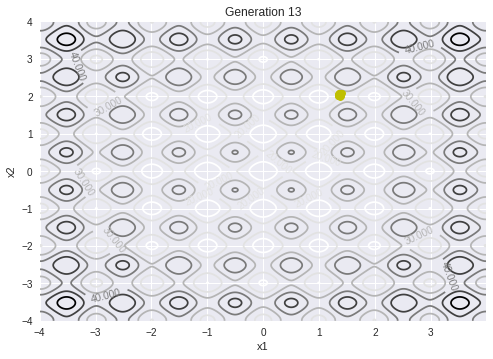

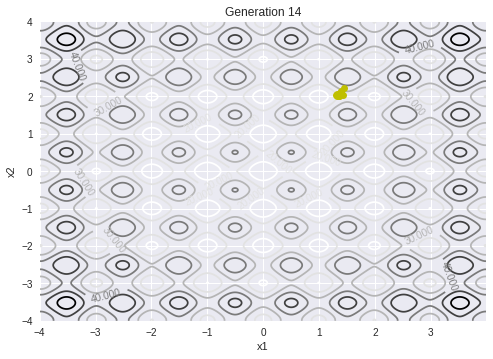

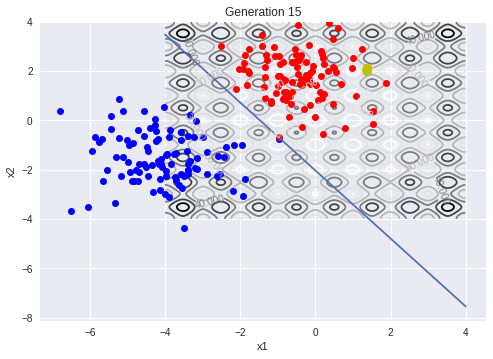

In [0]:
# as usual we import a bunch of modules that we need
import numpy as np
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot
from pandas import DataFrame



Data_set_size=200
X, Y = make_blobs(n_samples=200, centers=2, n_features=2,cluster_std=1.0, center_box=(-4.0, 4.0),random_state=1)
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()



np.random.seed(92)


# here we define the parameters of the algorithm. Some might even call these 
#hyperparameters; the parameters that define the model (they are different from parameters that the model is trying to optimzie or learn)
population_size=25                            # how many individuals are in the population. GA is a population based method.
population=np.random.rand(population_size,2)*8-4   # here we define a numpy array for the population, and randomly initilize it. 
                                                   # notice that we are initializing it within the solution space we are looking at, [-4 4]
                                                   # there are population_size of individuals, so we have the number of rows is population_size.
                                                   # each individual has two variables, x1 and x2, which relate to coordinates in the solution spcae. 
                                                   #therefore we have two columns.
new_population=np.zeros((population_size,2))       # this is a temporary place to hold the new generation while we are creating them from the current gen (population)
                                                   # when we are done creating the new generation, we copy the individuals from new_population to population.
tournament_size=5                                 # we use tournment selection to select who would reproduce. tournament_size is the size of the tournament.                  
select_potantial_parents=np.zeros((tournament_size,2))   # this is where all potential parents selected to attend the tournament are hold.
max_generation_num=15                              # this says how many generation we should simulate. 
mutation_frac=0.4                                  # this says what fraction of new generation should be mutated.
mutation_scale=0.05     

def perceptron(x1,x2,w1,w2,b):
                     #this is a two input perceptron
                     # we really really should implement neural networks in vector form, otherwise our programs would be awfully slow! 
                     # we had an entire exercise on this. Here just for the sake of simplicity and better understanding of what is happening we are using looping
                     #otherwise vectorization is a must.
  if(0<(x1*w1+x2*w2+b)):
    return(1)
  else:
    return(0)

def train_perc(z):
  w1,b=z
 
  m=np.zeros(tournament_size)
  miss_count=0
  for i in range(tournament_size):
    miss_count=0
    for j in range(Data_set_size):
      fit=perceptron(X[j][0],X[j][1],w1[i],1,b[i])
      if fit==Y[j]:
        miss_count +=1
    m[i]=miss_count
  return(m)
  
    


def crossover(a,b):              # this function implements the corssover operation, it recives parents a and b, and produces the child c! 
  c=np.random.rand(2)
  beta=np.random.rand(1)
  c[0]=beta*a[0]+(1-beta)*b[0]
  beta=np.random.rand(1)
  c[1]=beta*a[1]+(1-beta)*b[1]
  return(c)

def mutation(new_population):    # This function implements mutation. It recives the new generation, and mutates mutation_frac of them by adding gaussian noise to them.
  num_of_mutation=math.ceil(len(new_population)*mutation_frac)
  mutation_index=np.random.choice(len(new_population),num_of_mutation, replace=False, p=None)
  new_population[mutation_index,:]=new_population[mutation_index,:]+np.random.normal(0,mutation_scale,(num_of_mutation,2))    
  return(new_population)
  
  
  

for i in range(0, max_generation_num):      # This is your generation loop... by looping this you are going through generation after generation.
  
  for j in range(0,population_size):     # This is your new population loop. At each loop you create a new instance for the next population. Therefore this loops population_size times.
    
    select_potantial_parents=population[np.random.choice(len(population), size=tournament_size, replace=False)] # this is where we select some potential parents randomly
                                                                                                                # and let them compete against each other in a tournament.
                                                                                                                # the winner is simply the one who is the most fitted!
                                                                                                              
                                                                                                                
                                                          
    z=select_potantial_parents[:,0] # this is just a hack that I used to manage to send a vector to f instead of looping. Can you combine this line with the 
                                  #next line into the third line altogether? There should be a way...  
    v=select_potantial_parents[:,1]
    parent_1=select_potantial_parents[np.argmin(train_perc((z,v))),:]# this is where the most fitted individual in the tournament is selected to be parent 1.

    
    select_potantial_parents=population[np.random.choice(len(population), size=tournament_size, replace=False)]
    z=select_potantial_parents[:,0] # this is just a hack that I used to manage to send a vector to f instead of looping. Can you combine this line with the 
                                    #next line into the third line altogether? There should be a way...  
    v=select_potantial_parents[:,1]
    parent_2=select_potantial_parents[np.argmin(train_perc((z,v))),:]#the same as above, but this time the second parent is selected.
    
    
    
    new_population[j,:]=crossover(parent_1,parent_2) # these two parents reproduce individual j of the new population.
  
  new_population=mutation(new_population)  # we mutate a fraction of the new generation. 
  plt.figure(i+2)
  CS = plt.contour(x1mesh, x2mesh, fmesh)#,lines)
  plt.clabel(CS, inline=1, fontsize=10)
  plt.title('Generation %i'%(i+1))
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.plot(new_population[:,0],new_population[:,1],'y o')  # we show the individuals of generation i. As i goes up, the generation ends up more and more fitted 
                                                           #and usually converges to the global minimum point, the most fitted place in this solution space! 

  population=new_population.copy()                         #we replace the current generation with this new generation that we just created. 
  
index=np.argmin(population)
minval=np.array(population[index])
print(minval)

for r in range(Data_set_size):
  plt.plot(X[r][0],X[r][1],'bo' if (Y[r] == 1.0) else 'ro')

x=np.linspace(-4,4,num=70)
y=(-(minval[0])*x)+(-(minval[1]))

pyplot.plot(x,y)
pyplot.show()

 

  

